# Sampling, spatial filtering and Fourier Transform 

# Path to images

### Disclaimer: 
This notebook is prepared and assembled by John Meshreki, Chair for Computational Sensorics / Communications Engineering, University of Siegen.

Code is based on Hands-On Image Processing with Python by Sandipan Dey 

Some text description is from Digital Image Processing by Rafael C. Gonzalez and Richard E. Woods

In [1]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath('../'))

from scripts.config import path_to_images, path_to_output

In [2]:
PATH = path_to_images + "/general/"

In [3]:
#  create dates and output directory
import datetime

class DateTime:
    def __init__(self):
        pass

    @staticmethod
    def today_time_now():
        today = datetime.date.today()
        date_today = today.strftime("%Y_%m_%d")
        now = datetime.datetime.now()
        date_now = now.strftime("%Y_%m_%d_%H_%M_%S")    

        return date_today, date_now
    
def create_dir(path)->None:   
    """ Creats a directory.

    Parameters
    ----------
    date_today : str
        Date today.
    date_now : str
        Date now.
    """
    # Create the directory 
    path_dir_w_time = path
    try:
        os.makedirs(path_dir_w_time)
    except OSError as exc:
        if exc.errno != errno.EEXIST:
            raise
        pass
    
#  create dates and output directory
dt = DateTime()
date_today, date_now = dt.today_time_now()

output_path_dir_w_time = (path_to_output + "/" + date_today + "/" + date_now)
create_dir(output_path_dir_w_time)

### Import libraries

In [4]:
%matplotlib inline 
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
#from scipy.stats import signaltonoise
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit
import matplotlib.pyplot as plt
from PIL.ImageChops import difference, add

In [5]:
import scipy
scipy.__version__

'1.9.2'

### Up-Sampling

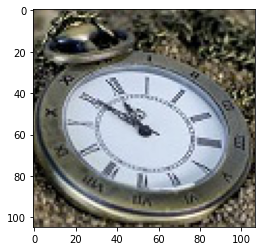

(<matplotlib.image.AxesImage at 0x7f6e794be680>, None)

In [6]:
im = Image.open(PATH + "clock.jpg") # the original small clock image
pylab.imshow(im), pylab.show()

/tmp/ipykernel_19058/3036485647.py:1: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  im1 = im.resize((im.width*5, im.height*5), Image.NEAREST) # nearest neighbor interpolation


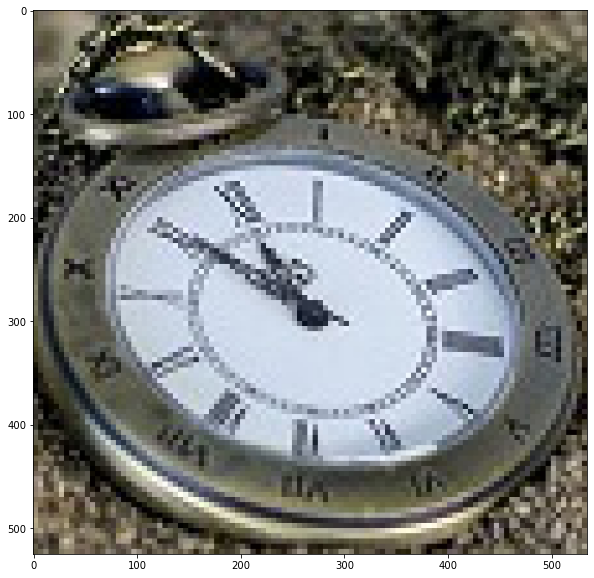

(<Figure size 720x720 with 1 Axes>,
 None)

In [7]:
im1 = im.resize((im.width*5, im.height*5), Image.NEAREST) # nearest neighbor interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

/tmp/ipykernel_19058/2794357491.py:1: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  im1 = im.resize((im.width*5, im.height*5), Image.BILINEAR) # up-sample with bi-linear interpolation


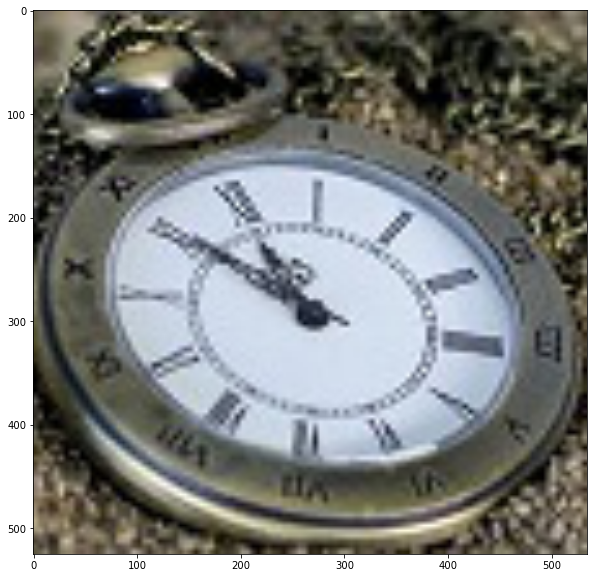

(<Figure size 720x720 with 1 Axes>,
 None)

In [8]:
im1 = im.resize((im.width*5, im.height*5), Image.BILINEAR) # up-sample with bi-linear interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

/tmp/ipykernel_19058/2834882535.py:1: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  im.resize((im.width*10, im.height*10), Image.BICUBIC).show() # bi-cubic interpolation
This tool has been deprecated, use 'gio open' instead.
See 'gio help open' for more info.



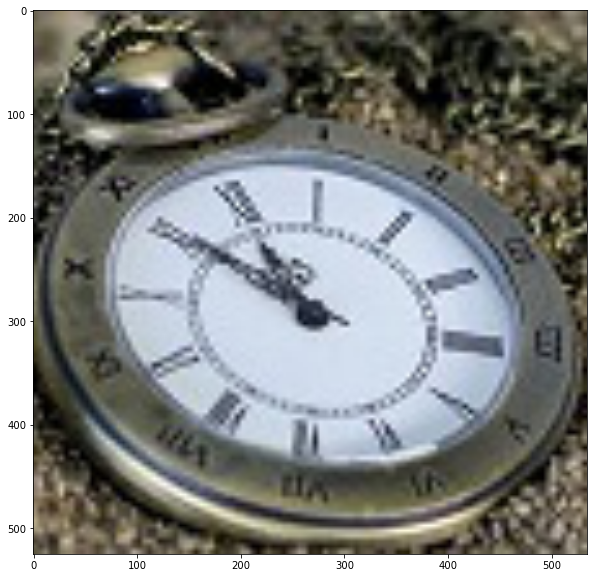

(<Figure size 720x720 with 1 Axes>,
 None)

In [9]:
im.resize((im.width*10, im.height*10), Image.BICUBIC).show() # bi-cubic interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

### Down-sampling and Aliasing

In [10]:
im = Image.open(PATH + "tajmahal.jpg")
im.show()

This tool has been deprecated, use 'gio open' instead.
See 'gio help open' for more info.



/tmp/ipykernel_19058/1807047897.py:3: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  im = im.resize((im.width//10, im.height//10), Image.NEAREST)


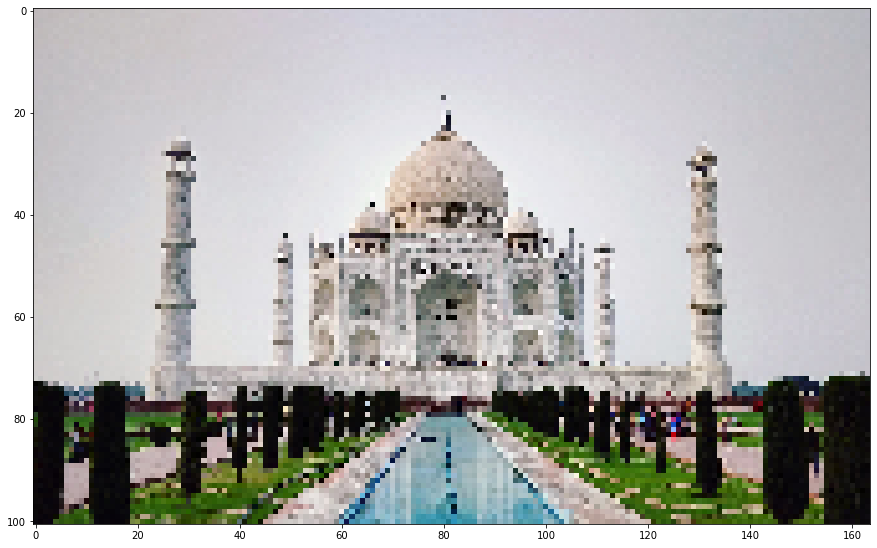

(<Figure size 1080x720 with 1 Axes>,
 None)

In [11]:
im = Image.open(PATH + "tajmahal.jpg")
#im = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)
im = im.resize((im.width//10, im.height//10), Image.NEAREST)
pylab.figure(figsize=(15,10)), pylab.imshow(im), pylab.show()
#im.show()

/tmp/ipykernel_19058/162405293.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((im.width//10, im.height//10), Image.ANTIALIAS)


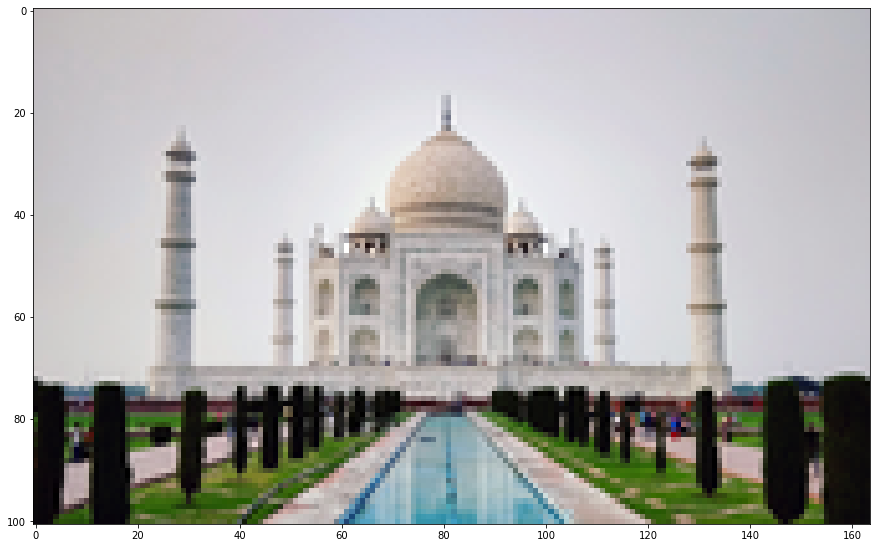

(<Figure size 1080x720 with 1 Axes>,
 None)

In [12]:
im = Image.open(PATH + "tajmahal.jpg")
im = im.resize((im.width//10, im.height//10), Image.ANTIALIAS)
#im = im.resize((im.width//10, im.height//10))
pylab.figure(figsize=(15,10)), pylab.imshow(im), pylab.show()
#im.show()

/tmp/ipykernel_19058/1542347196.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im_antialias = im.resize((im.width//10, im.height//10), Image.ANTIALIAS)
/tmp/ipykernel_19058/1542347196.py:3: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  im_no_antialias = im.resize((im.width//10, im.height//10), Image.NEAREST)


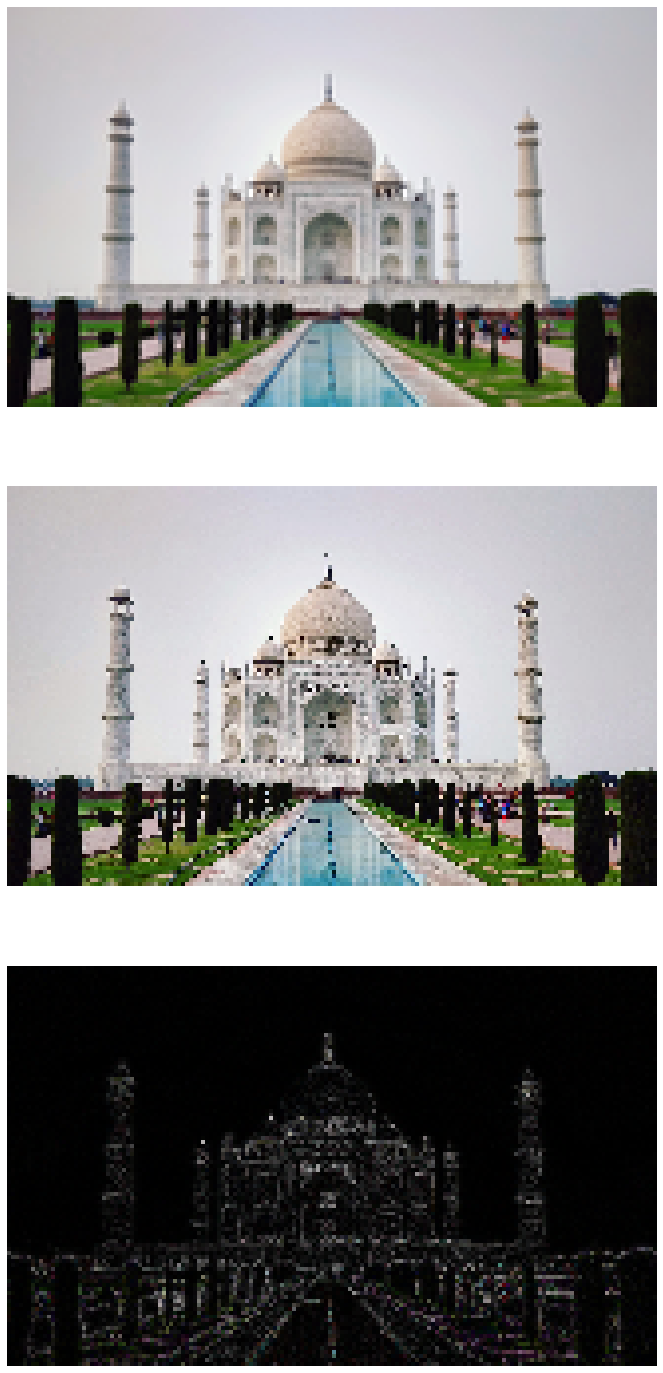

In [14]:
im = Image.open(PATH + "tajmahal.jpg")
im_antialias = im.resize((im.width//10, im.height//10), Image.ANTIALIAS)
im_no_antialias = im.resize((im.width//10, im.height//10), Image.NEAREST)

im_diff = difference(im_antialias, im_no_antialias)
plt.figure(figsize=(20,25))
im.save(output_path_dir_w_time + "/antialis_diff.png")
plt.subplot(311)
plt.imshow(im_antialias)
plt.axis('off')
plt.subplot(312)
plt.imshow(im_no_antialias)
plt.axis('off')
plt.subplot(313)
plt.imshow(im_diff), plt.axis('off')
plt.show()

/tmp/ipykernel_19058/1954778243.py:7: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  im1 = rescale(im1, scale = 0.4, multichannel=True, anti_aliasing=False)


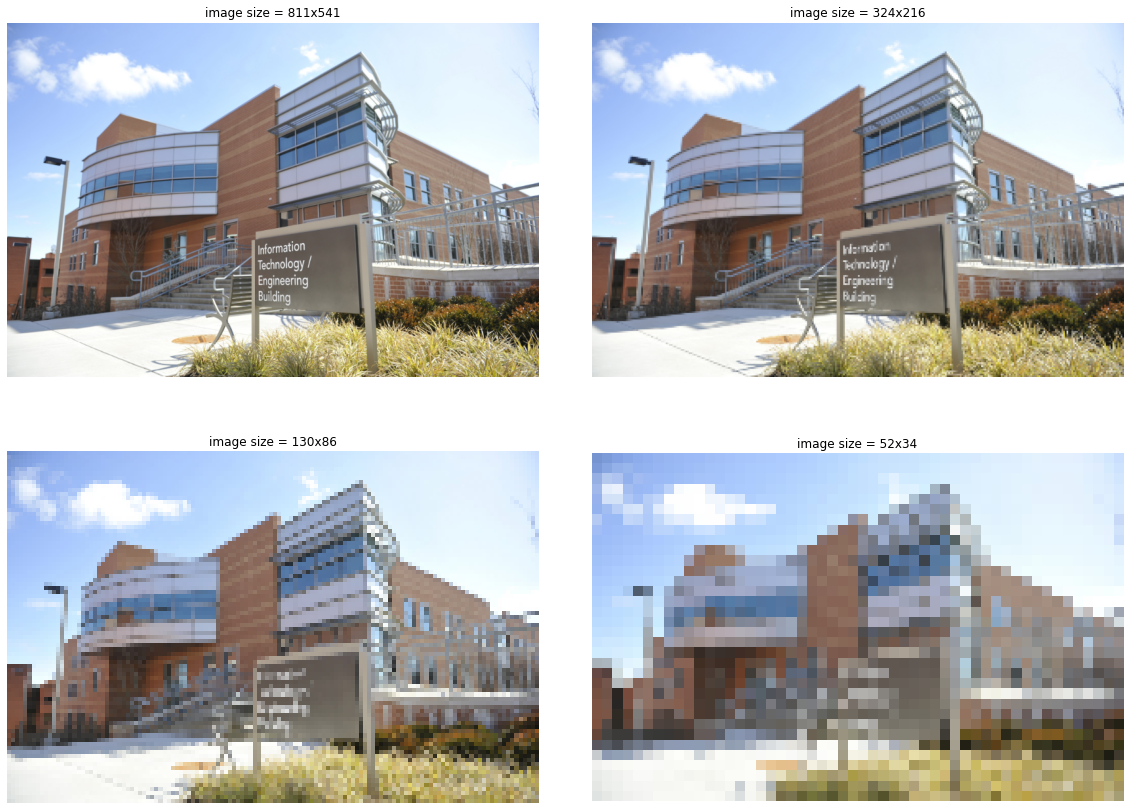

In [15]:
im = imread(PATH + 'umbc.png')
im1 = im.copy()
pylab.figure(figsize=(20,15))
for i in range(4):
    pylab.subplot(2,2,i+1), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('image size = ' + str(im1.shape[1]) + 'x' + str(im1.shape[0]))
    im1 = rescale(im1, scale = 0.4, multichannel=True, anti_aliasing=False)
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

/tmp/ipykernel_19058/3203355948.py:7: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  im1 = rescale(im1, scale = 0.4, multichannel=True, anti_aliasing=True)


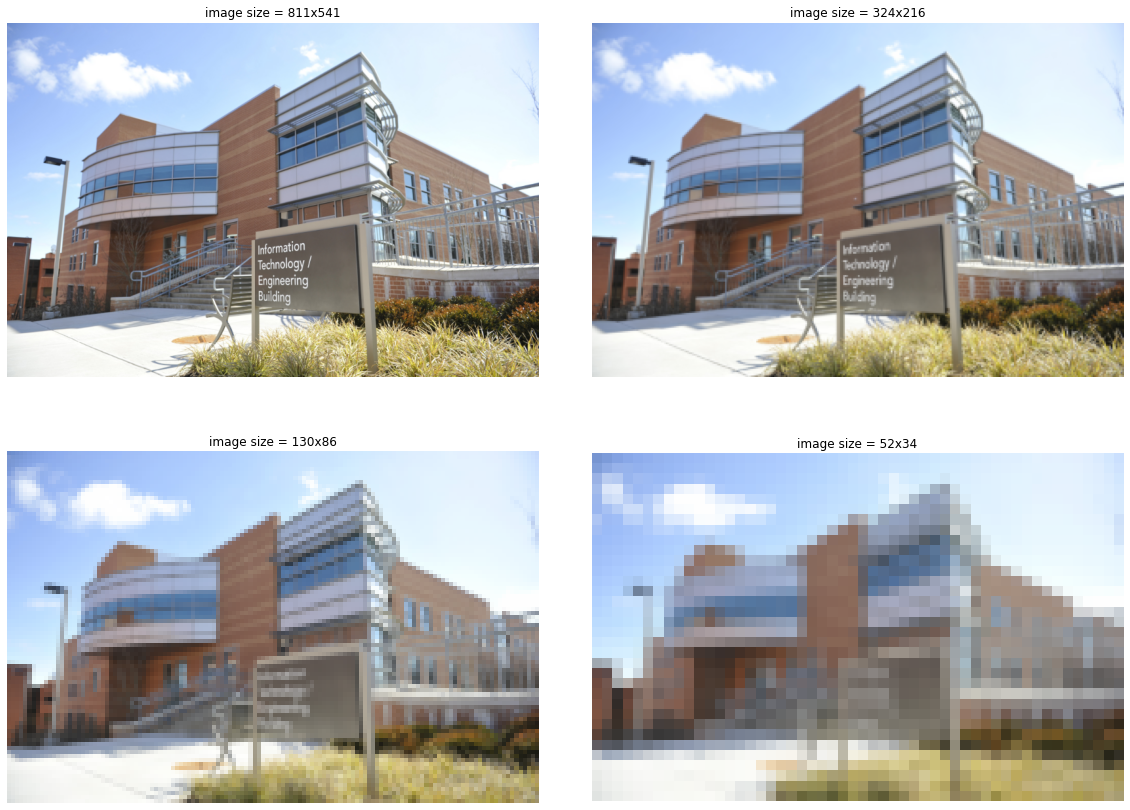

In [16]:
im = imread(PATH + 'umbc.png')
im1 = im.copy()
pylab.figure(figsize=(20,15))
for i in range(4):
    pylab.subplot(2,2,i+1), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('image size = ' + str(im1.shape[1]) + 'x' + str(im1.shape[0]))
    im1 = rescale(im1, scale = 0.4, multichannel=True, anti_aliasing=True)
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

### Quantizing with PIL

In [17]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

/tmp/ipykernel_19058/3419600339.py:7: DeprecationWarning: ADAPTIVE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Palette.ADAPTIVE instead.
  im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)


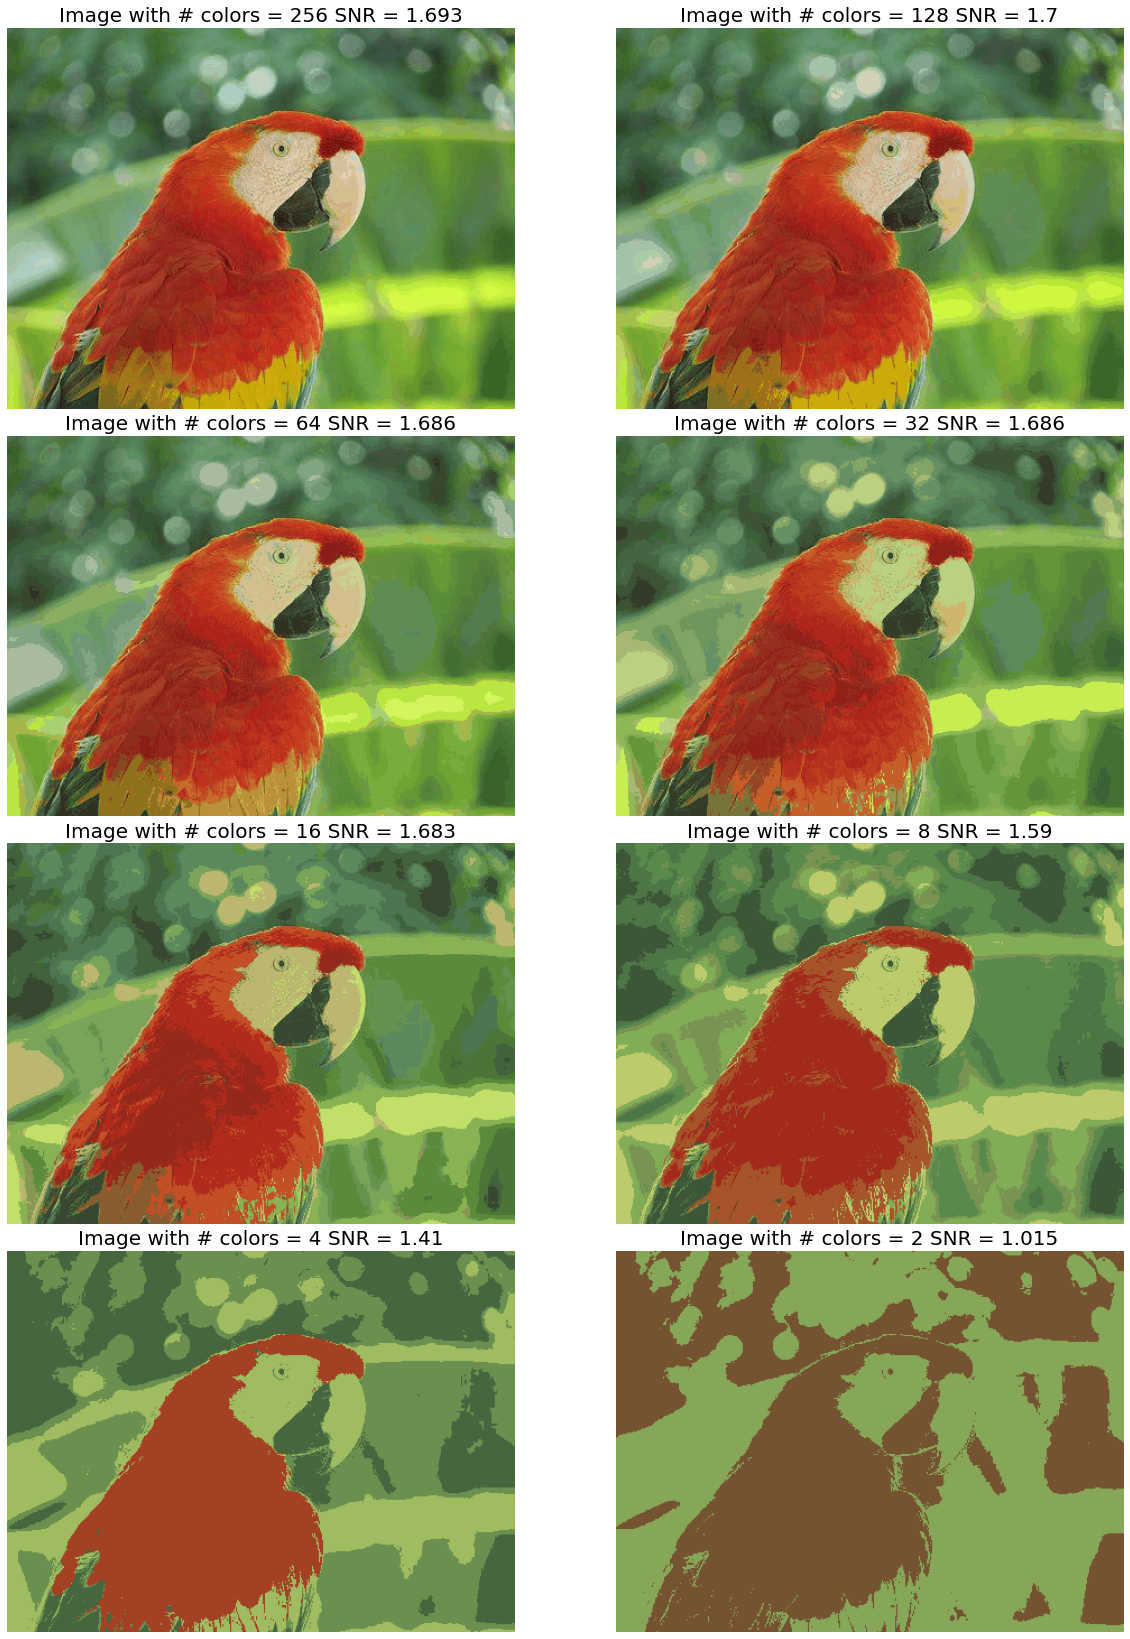

In [18]:
im = Image.open(PATH + 'parrot.jpg')
pylab.figure(figsize=(20,30))
num_colors_list = [1 << n for n in range(8,0,-1)]
snr_list = []
i = 1
for num_colors in num_colors_list:
    im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    pylab.subplot(4,2,i), pylab.imshow(im1), pylab.axis('off')
    snr_list.append(signaltonoise(im1, axis=None))
    pylab.title('Image with # colors = ' + str(num_colors) + ' SNR = ' +
    str(np.round(snr_list[i-1],3)), size=20)
    i += 1
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

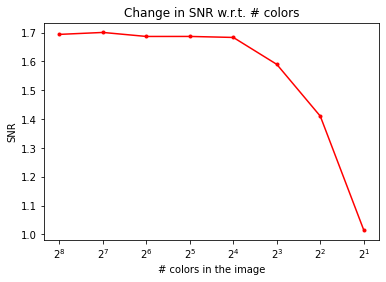

In [19]:
pylab.plot(num_colors_list, snr_list, 'r.-')
pylab.xlabel('# colors in the image')
pylab.ylabel('SNR')
pylab.title('Change in SNR w.r.t. # colors')
pylab.xscale('log', base=2)  # Changed 'basex' to 'base'
pylab.gca().invert_xaxis()
pylab.show()


# Spatial Filtering
The name filter is borrowed from frequency domain processing (the topic of Chapter 4) where “filtering” refers to passing, modifying, or rejecting specified frequency components of an image. For example, a filter that passes low frequencies is called a lowpass filter. The net effect produced by a lowpass filter is to smooth an image by blurring it. We can accomplish similar smoothing directly on the image itself by using spatial filters.

A linear spatial filter performs a sum-of-products operation between an image f and a filter kernel, w. The kernel is an array whose size defines the neighborhood of operation, and whose coefficients determine the nature of the filter. Other terms used to refer to a spatial filter kernel are mask, template, and window.

For a kernel of size $( m \times n )$, we assume that $( m = 2a + 1 )$ and \( n = 2b + 1 \), where \( a \) and \( b \) are nonnegative integers. This means that our focus is on kernels of odd size in both coordinate directions. In general, linear spatial filtering of an image of size \( M \times N \) with a kernel of size \( m \times n \) is given by the expression:

$$
g(x, y) = \sum_{s=-a}^{a} \sum_{t=-b}^{b} w(s, t) f(x+s, y+t)
$$

where \( (x, y) \) are varied so that the center (origin) of the kernel visits every pixel in \( f \) once. For a fixed value of \( (x, y) \), the kernel is centered on \( f(x, y) \), and the image values under the kernel are multiplied by the corresponding kernel values and summed to produce the value at \( g(x, y) \).


# low pass filtering

kernel 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


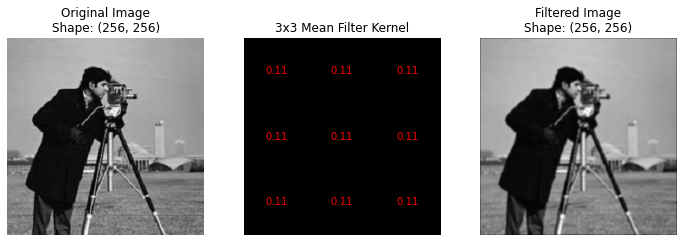

In [20]:
# example of a low pass filter: box kernel 
#-- it removes high frequency details (it removes edges)-- (smoothing / denoising)
# it does averaging within a neibourhood of some pixel at (x,y)
# it is actually analogous to spatial integration
#Caveat: Too much smoothing would result in a too much blurred image! 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image

# Load an image and convert it to grayscale
image = Image.open(PATH + 'cameraman.jpg').convert('L')
image_np = np.array(image)

# Define the size of the kernel
m, n = 3, 3  # Example sizes, must be odd

# Create a kernel - mean filter (a box filter: 
# coefficients are typically 1 and they're multiplied by a normalizing constant 1/m*n)
kernel = np.ones((m, n)) / (m * n)

# Calculate the amount of padding needed
pad_height = m // 2
pad_width = n // 2

# Pad the image with zeros (zero-padding)
image_padded = np.pad(image_np, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

# Perform the convolution (linear spatial filtering) using 'valid' to only consider valid overlaps
filtered_image = convolve2d(image_padded, kernel, boundary='fill', mode='valid')

# Plotting the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_np, cmap='gray')
plt.title(f'Original Image\nShape: {image_np.shape}')
plt.axis('off')  # Hide the axis

# Plotting the kernel and annotating pixel values
plt.subplot(1, 3, 2)
plt.imshow(kernel, cmap='gray', interpolation='nearest')
plt.title('3x3 Mean Filter Kernel')
# Annotate pixel values
for (j, i), val in np.ndenumerate(kernel):
    plt.text(i, j, f'{val:.2f}', ha='center', va='center', color='red')
plt.axis('off')  # Hide the axis
print(f'kernel \n {kernel}')

# Plotting the filtered (output) image
plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title(f'Filtered Image\nShape: {filtered_image.shape}')
plt.axis('off')  # Hide the axis

# Show the plots
plt.show()


# High pass filtering

kernel 
 [[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


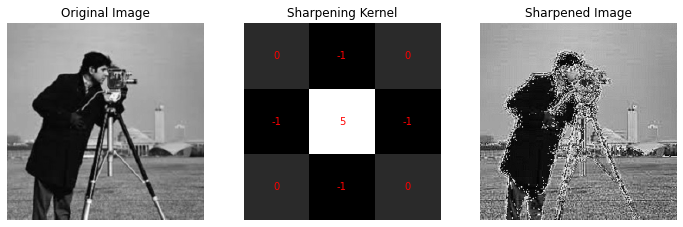

In [21]:
# example of a high pass filter 
#-- it removes low frequency details (it enhances edges!) -- (sharpening)
# it is actually analogous to spatial differentiation
#Caveat: other discontinuities such as noise could be enhanced!

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

# Load an image and convert it to grayscale
image = Image.open(PATH + 'cameraman.jpg').convert('L')
image_np = np.array(image)

# Define a sharpening kernel (Laplacian filter)
# The center value is positive and greater than the sum of the absolute 
# values of the negative coefficients to enhance the high-frequency components (edges) in the image.
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Perform the convolution (linear spatial filtering)
sharpened_image = convolve(image_np, sharpening_kernel)

# Plotting the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plotting the sharpening kernel
plt.subplot(1, 3, 2)
plt.imshow(sharpening_kernel, cmap='gray', interpolation='nearest')
plt.title('Sharpening Kernel')
# Annotate kernel values
for (j, i), val in np.ndenumerate(sharpening_kernel):
    plt.text(i, j, f'{val:.0f}', ha='center', va='center', color='red')
plt.axis('off')
print(f'kernel \n {sharpening_kernel}')

# Plotting the sharpened (output) image
plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

# Show the plots
plt.show()


Edges in digital images often are ramp-like transitions in intensity, in which case the first derivative of the image would result in thick edges because the derivative is nonzero along a ramp. On the other hand, the second derivative would produce a double edge one pixel thick, separated by zeros. From this, we conclude that the second derivative enhances fine detail much better than the first derivative, a property ideally suited for sharpening images. Also, second derivatives require fewer operations to implement than first derivatives, so our initial attention is on the former.

### Spatial Differentation

In [22]:
# Open the image using PIL
im = Image.open(PATH + 'spatial_differentiation.png')

# Optionally, apply a title via PIL by appending the text to the image
# This requires the `ImageDraw` module from PIL to draw text
from PIL import ImageDraw, ImageFont
draw = ImageDraw.Draw(im)
# Use a truetype font (.ttf file)
draw.text((10, 10), "Digital Image Processing by Rafael C. Gonzalez and Richard E. Woods")

# Show the image, which should open in the default system image viewer
im.show()

This tool has been deprecated, use 'gio open' instead.
See 'gio help open' for more info.



### The Laplacian Edge Detector
It calculates second order derivatives. One serious drawback though - because we're working with second order derivatives, the laplacian edge detector is extremely sensitive to noise. Usually, you'll want to reduce noise - maybe using the Gaussian blur. 

253.0
(256, 256)


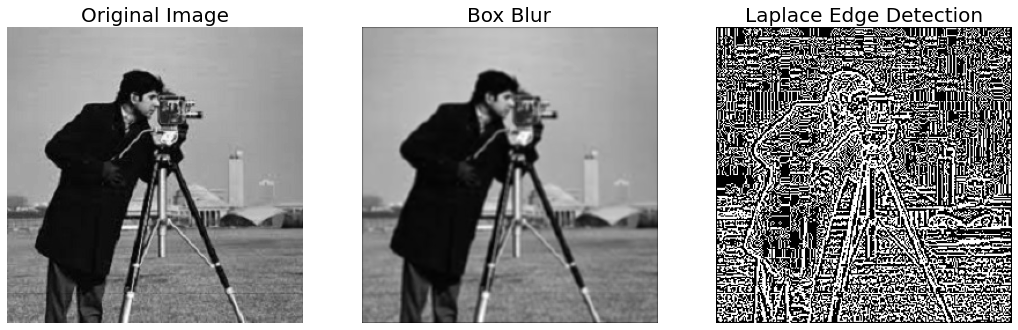

In [23]:
im = imread(PATH + 'cameraman.jpg').astype(float)
#im = imread(PATH + 'moon.jpg').astype(float)
# Check if the image has an alpha channel (indicated by having four channels)
if im.shape[-1] == 4:
    # Drop the alpha channel, keep only the RGB channels
    im = im[..., :3]
# Now convert the image to grayscale
im = rgb2gray(im)
print(np.max(im))
print(im.shape)
blur_box_kernel = np.ones((3,3)) / 9
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
im_blurred = signal.convolve2d(im, blur_box_kernel, mode='same')
im_edges = np.clip(signal.convolve2d(im, edge_laplace_kernel, mode='same'), 0, 1)
#im_edges = np.clip(signal.convolve2d(im_blurred, edge_laplace_kernel), 0, 1)
fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(18,6))
axes[0].imshow(im, cmap=pylab.cm.gray)
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_blurred, cmap=pylab.cm.gray)
axes[1].set_title('Box Blur', size=20)
#axes[2].imshow(im_edges, cmap=pylab.cm.gray)
# combined_image = im + im_edges
# combined_image_normalized = combined_image / np.max(combined_image)
# axes[2].imshow(combined_image_normalized, cmap=pylab.cm.gray)
axes[2].imshow(im_edges, cmap=pylab.cm.gray)
axes[2].set_title('Laplace Edge Detection', size=20)
for ax in axes:
    ax.axis('off')
pylab.show()

253.0
(256, 256)


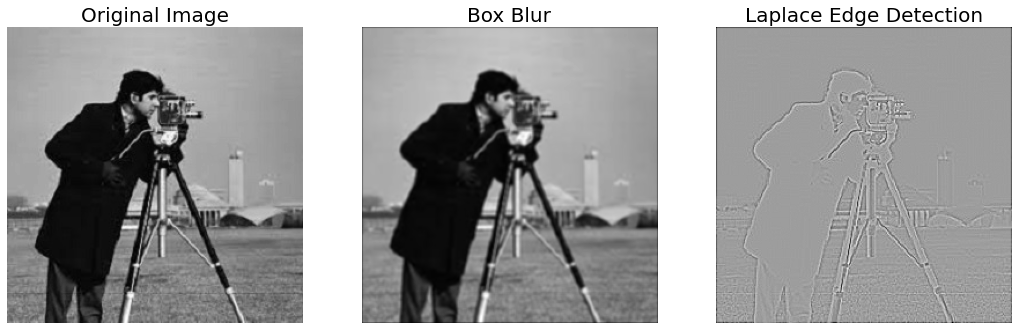

In [24]:
im = imread(PATH + 'cameraman.jpg').astype(float)
#im = imread(PATH + 'moon.jpg').astype(float)
# Check if the image has an alpha channel (indicated by having four channels)
if im.shape[-1] == 4:
    # Drop the alpha channel, keep only the RGB channels
    im = im[..., :3]
# Now convert the image to grayscale
im = rgb2gray(im)
print(np.max(im))
print(im.shape)
blur_box_kernel = np.ones((3,3)) / 9
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
im_blurred = signal.convolve2d(im, blur_box_kernel, mode='same')
# Perform the convolution to get the edges
im_edges = signal.convolve2d(im, edge_laplace_kernel, mode='same')
# Step 1: Shift the image by subtracting the minimum value to ensure the minimum is 0
im_edges_min_shifted = im_edges - np.min(im_edges)
# Step 2: Scale the shifted image to the full 8-bit range [0, 255]
im_edges_scaled = 255 * (im_edges_min_shifted / np.max(im_edges_min_shifted))
# Ensure the scaled image has the correct data type and is clipped to [0, 255]
im_edges_scaled = np.clip(im_edges_scaled, 0, 255).astype(np.uint8)
fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(18,6))
axes[0].imshow(im, cmap=pylab.cm.gray)
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_blurred, cmap=pylab.cm.gray)
axes[1].set_title('Box Blur', size=20)
axes[2].imshow(im_edges_scaled, cmap=pylab.cm.gray)
axes[2].set_title('Laplace Edge Detection', size=20)
for ax in axes:
    ax.axis('off')
pylab.show()

## Fourier Transform

### FFT with the scipy.fftpack module

SNR for the original image = 2.032390538354219
SNR for the image obtained after reconstruction = 2.0323905383542193


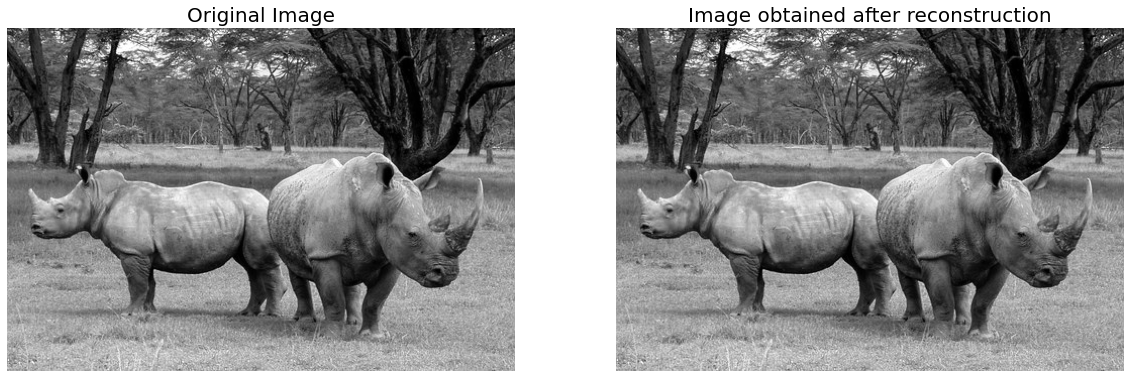

In [25]:
im = np.array(Image.open(PATH + 'rhino.jpg').convert('L')) # we shall work with grayscale image
snr = signaltonoise(im, axis=None)
print('SNR for the original image = ' + str(snr))
# SNR for the original image = 2.023722773801701
# now call FFT and IFFT
freq = fp.fft2(im)
im1 = fp.ifft2(freq).real
snr = signaltonoise(im1, axis=None)
print('SNR for the image obtained after reconstruction = ' + str(snr))
# SNR for the image obtained after reconstruction = 2.0237227738013224
assert(np.allclose(im, im1)) # make sure the forward and inverse FFT are close to each other
pylab.figure(figsize=(20,10))
pylab.subplot(121), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.title('Original Image', size=20)
pylab.subplot(122), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
pylab.title('Image obtained after reconstruction', size=20)
pylab.show()

/tmp/ipykernel_19058/195589054.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()


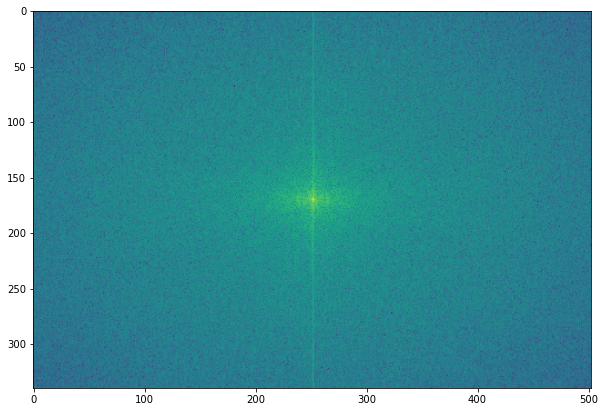

(<Figure size 720x720 with 1 Axes>,
 None)

In [26]:
# the quadrants are needed to be shifted around in order that the low spatial frequencies (the DC coefficients) are in the center of the 2D fourier-transformed image.
freq2 = fp.ifftshift(freq)
pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()

### FFT with the numpy.fft module

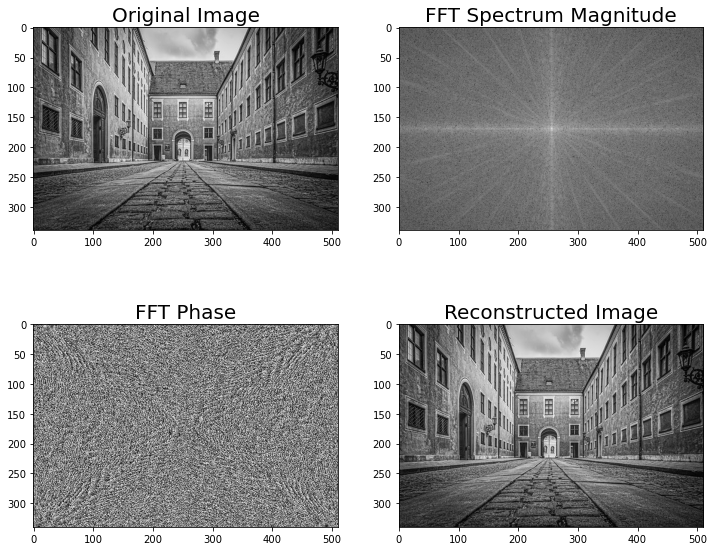

In [27]:
import numpy.fft as fp
im1 = imread(PATH + 'house.png')
# Check if the image has an alpha channel (indicated by having four channels)
if im1.shape[-1] == 4:
    # Drop the alpha channel, keep only the RGB channels
    im1 = im1[..., :3]
# Now convert the image to grayscale
im1 = rgb2gray(im1)
pylab.figure(figsize=(12, 10))
freq1 = fp.fft2(im1)
im1_ = fp.ifft2(freq1).real
pylab.subplot(2, 2, 1), pylab.imshow(im1, cmap='gray'), pylab.title('Original Image', size=20)
pylab.subplot(2, 2, 2), pylab.imshow(20 * np.log10(0.01 + np.abs(fp.fftshift(freq1))), cmap='gray')
pylab.title('FFT Spectrum Magnitude', size=20)
pylab.subplot(2, 2, 3), pylab.imshow(np.angle(fp.fftshift(freq1)), cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.subplot(2, 2, 4), pylab.imshow(np.clip(im1_, 0, 255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

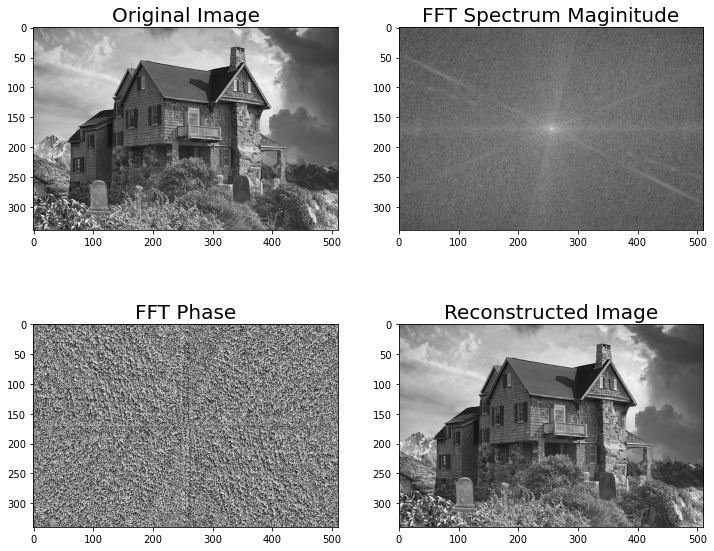

In [28]:
im2 = imread(PATH + 'house2.png')
# Check if the image has an alpha channel (indicated by having four channels)
if im2.shape[-1] == 4:
    # Drop the alpha channel, keep only the RGB channels
    im2 = im2[..., :3]
# Now convert the image to grayscale
im2 = rgb2gray(im2)
pylab.figure(figsize=(12,10))
freq2 = fp.fft2(im2)
im2_ = fp.ifft2(freq2).real
pylab.subplot(2,2,1), pylab.imshow(im2, cmap='gray'), pylab.title('Original Image', size=20)
pylab.subplot(2,2,2), pylab.imshow(20*np.log10( 0.01 +
np.abs(fp.fftshift(freq2))), cmap='gray')
pylab.title('FFT Spectrum Maginitude', size=20)
pylab.subplot(2,2,3), pylab.imshow(np.angle(fp.fftshift(freq2)), cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.subplot(2,2,4), pylab.imshow(np.clip(im2_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

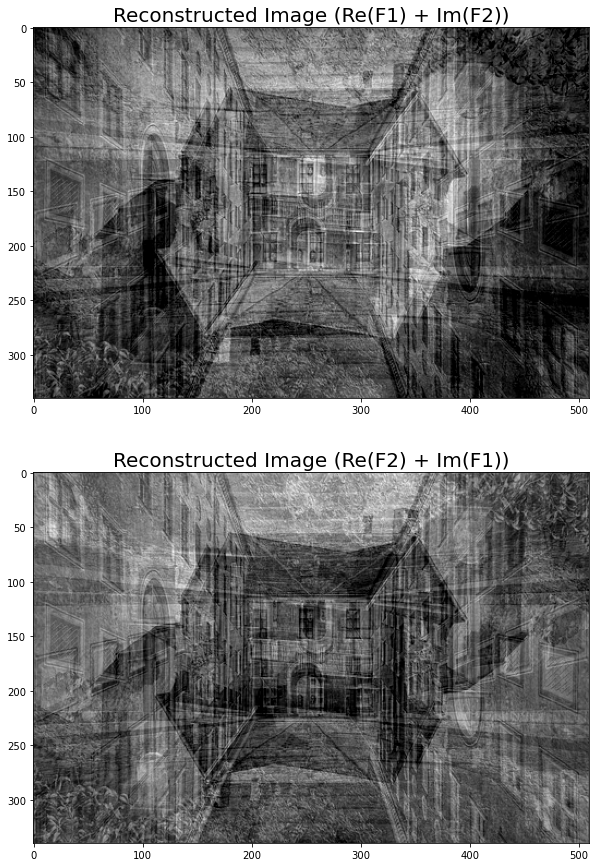

In [29]:
pylab.figure(figsize=(20,15))
im1_ = fp.ifft2(np.vectorize(complex)(freq1.real, freq2.imag)).real
im2_ = fp.ifft2(np.vectorize(complex)(freq2.real, freq1.imag)).real
pylab.subplot(211), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image (Re(F1) + Im(F2))', size=20)
pylab.subplot(212), pylab.imshow(np.clip(im2_,0,255), cmap='gray')
pylab.title('Reconstructed Image (Re(F2) + Im(F1))', size=20)
pylab.show()